In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("customer_transactions_sample.csv")
df1=pd.read_csv("Book1.csv")

In [ ]:
df=pd.concat([df,df1])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# product people like to buy

In [ ]:
fav_product=df['StockCode'].value_counts()
fav_product

StockCode
85123A       5829
22423        4424
85099B       4216
21212        3318
20725        3259
             ... 
DCGS0067        1
DCGS0066P       1
DCGS0071        1
DCGS0073        1
90197A          1
Name: count, Length: 5305, dtype: int64

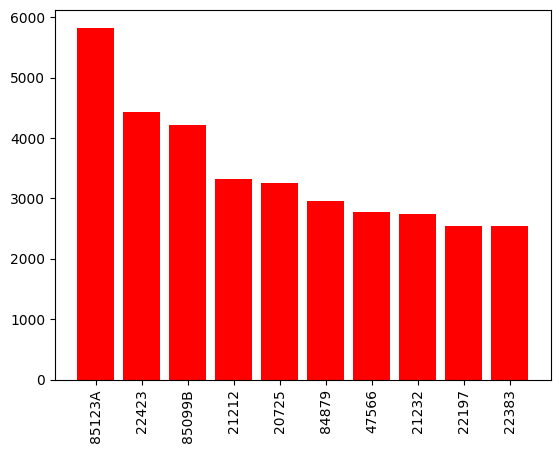

In [ ]:
fig, ax = plt.subplots()
ax.bar(fav_product.head(10).index.astype(str), fav_product.head(10).values, color='red')
plt.xticks(rotation='vertical')
plt.show()

# Customer with maximum orders


In [ ]:
customers=df['Customer ID'].value_counts()
customers


Customer ID
17841.0    13097
14911.0    11613
12748.0     7307
14606.0     6709
14096.0     5128
           ...  
14580.0        1
16154.0        1
16443.0        1
15233.0        1
17948.0        1
Name: count, Length: 5942, dtype: int64

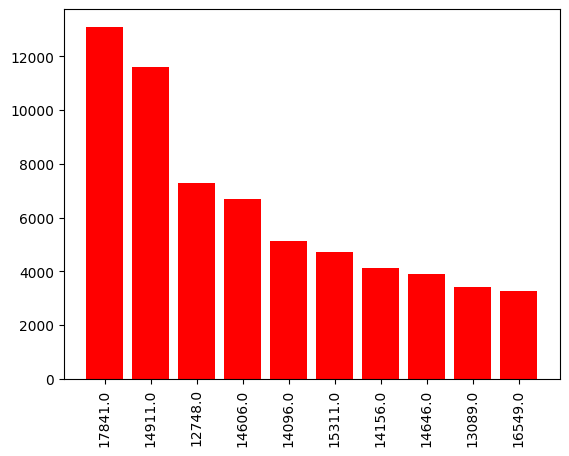

In [ ]:
fig, ax = plt.subplots()
ax.bar(customers.head(10).index.astype(str), customers.head(10).values, color='red')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#convert message data type
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format="%m/%d/%Y %H:%M")
df.rename(columns={'InvoiceDate':'date'},inplace=True)
df.head()

,Description,Quantity,date,Price,Country
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [ ]:
df.shape

(1067371, 5)

In [ ]:
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [ ]:
df.head()

,Description,Quantity,date,Price,Country,year,month_num,month,day,day_name,hour,minute
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,2009,12,December,1,Tuesday,7,45
1,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,2009,12,December,1,Tuesday,7,45
2,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,2009,12,December,1,Tuesday,7,45
3,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,2009,12,December,1,Tuesday,7,45
4,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,2009,12,December,1,Tuesday,7,45


In [ ]:
df['Price'].sum()

4962621.627999999

In [ ]:
df['Quantity'].sum()

10608492

# Monthly Price/sales Comparison



In [ ]:
timeline = df.groupby(['year', 'month_num', 'month'])['Price'].sum().reset_index()
time = []
for i in range(timeline.shape[0]):
        time.append(timeline['month'][i]+"-" + str(timeline['year'][i]))
timeline['time'] = time

In [ ]:
timeline

,year,month_num,month,Price,time
0,2009,12,December,198307.760,December-2009
1,2010,1,January,165671.362,January-2010
2,2010,2,February,116774.536,February-2010
3,2010,3,March,268304.241,March-2010
4,2010,4,April,120708.372,April-2010
5,2010,5,May,142885.530,May-2010
6,2010,6,June,234869.690,June-2010
7,2010,7,July,100650.900,July-2010
8,2010,8,August,157778.090,August-2010
9,2010,9,September,223763.221,September-2010


In [ ]:
timeline['Price'].sum()

4962621.628

[]

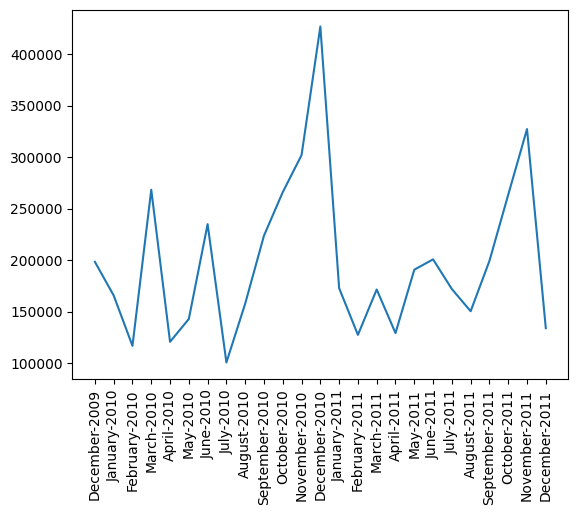

In [ ]:
fig, ax = plt.subplots()
ax.plot(timeline['time'], timeline['Price'])
plt.xticks(rotation='vertical')
plt.plot()


# country wise order distribution

In [ ]:
country=df['Country'].value_counts()
country_df =pd.DataFrame({"country": country.index.to_list(), "orders": country.values.tolist()})
country_df.head(20)

,country,orders
0,United Kingdom,981330
1,EIRE,17866
2,Germany,17624
3,France,14330
4,Netherlands,5140
5,Spain,3811
6,Switzerland,3189
7,Belgium,3123
8,Portugal,2620
9,Australia,1913


# Busiest day in week

In [ ]:
busy_day=df['day_name'].value_counts()
busy_day

day_name
Thursday     203149
Tuesday      196626
Monday       189084
Wednesday    185051
Friday       153803
Sunday       139256
Saturday        402
Name: count, dtype: int64

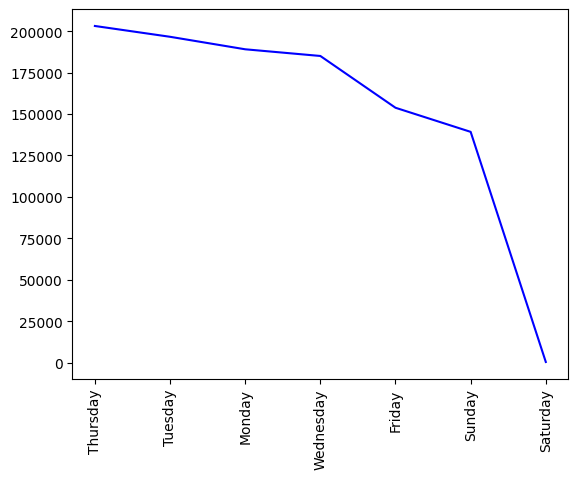

In [ ]:
fig, ax = plt.subplots()
ax.plot(busy_day.index, busy_day.values, color='blue')
plt.xticks(rotation='vertical')
plt.show()

# Busiest Month

In [ ]:
busy_month=df['month'].value_counts()

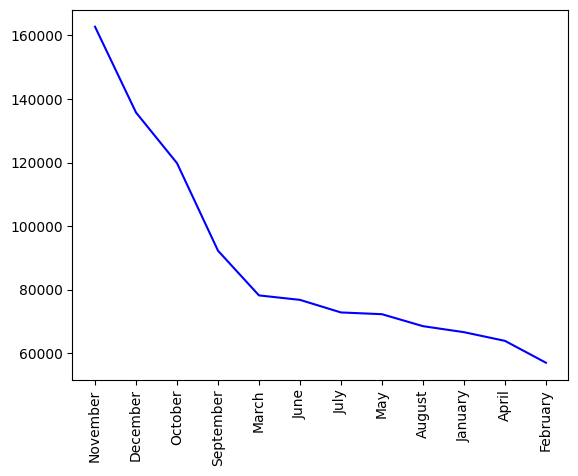

In [ ]:
fig, ax = plt.subplots()
ax.plot(busy_month.index, busy_month.values, color='blue')
plt.xticks(rotation='vertical')
plt.show()

#Monthly Quantity  Sales

In [ ]:
sales= df.groupby(['year', 'month_num', 'month']).count()['Quantity'].reset_index()
sale = []
for i in range(sales.shape[0]):
        sale.append(sales['month'][i]+"-" + str(sales['year'][i]))
sales['time'] = time

In [ ]:
sales

,year,month_num,month,Quantity,time
0,2009,12,December,45228,December-2009
1,2010,1,January,31555,January-2010
2,2010,2,February,29388,February-2010
3,2010,3,March,41511,March-2010
4,2010,4,April,34057,April-2010
5,2010,5,May,35323,May-2010
6,2010,6,June,39983,June-2010
7,2010,7,July,33383,July-2010
8,2010,8,August,33306,August-2010
9,2010,9,September,42091,September-2010


[]

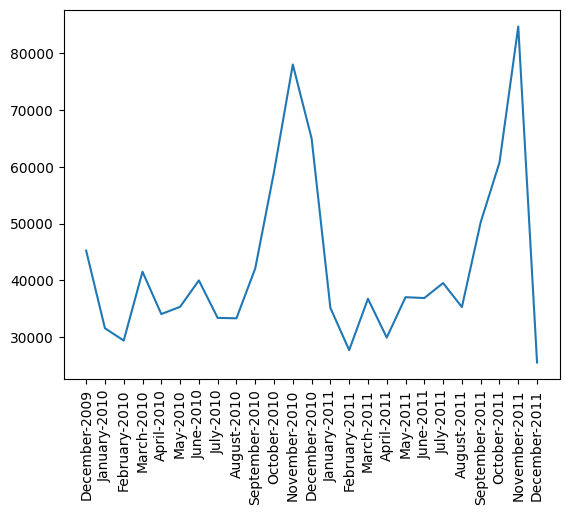

In [ ]:
fig, ax = plt.subplots()
ax.plot(sales['time'], sales['Quantity'])
plt.xticks(rotation='vertical')
plt.plot()


In [ ]:
product_quantity=df['Quantity'].value_counts()
product_quantity


Quantity
 1        294346
 2        159960
 12       121745
 6         85299
 3         72638
           ...  
-364           1
-1480          1
-999           1
 3960          1
-80995         1
Name: count, Length: 1057, dtype: int64

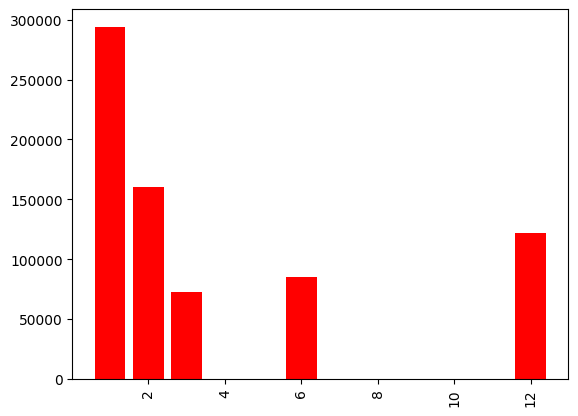

In [ ]:
fig, ax = plt.subplots()
ax.bar(product_quantity.head(5).index, product_quantity.head(5).values, color='red')
plt.xticks(rotation='vertical')
plt.show()

# clustering

In [ ]:
df=df.dropna(subset=["Price"])

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
lst=list(df['Price'].unique())
print(type(lst))
lst.sort()
print(lst)

<class 'list'>
[-53594.36, -44031.79, -38925.87, -11062.06, 0.0, 0.001, 0.01, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.24, 0.25, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.47, 0.48, 0.49, 0.5, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.04, 1.05, 1.06, 1.07, 1.08, 1.1, 1.11, 1.12, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.38, 1.4, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.7

In [ ]:
import numpy as np

df["label"] = np.select(
    [df.Price < 50, (df.Price >= 50) & (df.Price< 150) , (df.Price>= 150)&(df.Price < 300), df.Price >= 300],
    [1, 2, 3,4],
)
df["label"] = df["label"].astype(int)
df.label.unique()

array([1, 2, 4, 3])

In [ ]:
df =df[["label","Quantity","Price"]]
df

,label,Quantity,Price
0,1,12,6.95
1,1,12,6.75
2,1,12,6.75
3,1,48,2.10
4,1,24,1.25
...,...,...,...
541905,1,6,2.10
541906,1,4,4.15
541907,1,4,4.15
541908,1,3,4.95


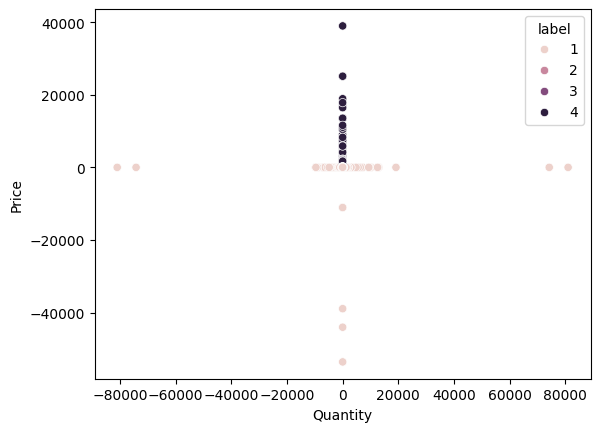

In [ ]:
cols=['Quantity','Price','label']
import seaborn as sns
for i in range(len(cols)-1):
  for j in range(i+1,len(cols)-1):
    x_label=cols[i]
    y_label=cols[j]
    sns.scatterplot(x=x_label,y=y_label,data=df,hue='label')
    plt.show()